Loading data...
Shape: (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14

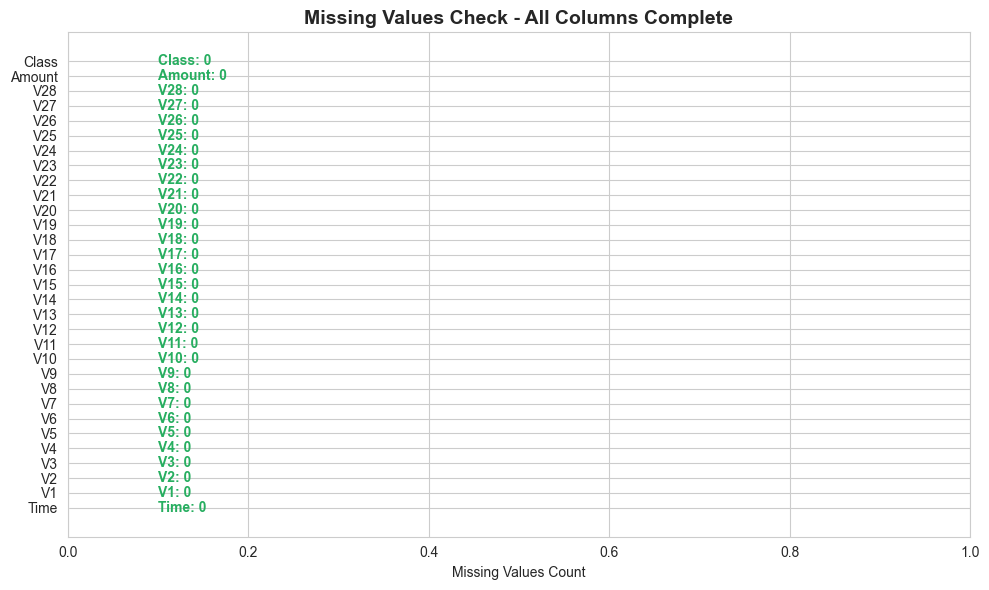


Generating class distribution plot...


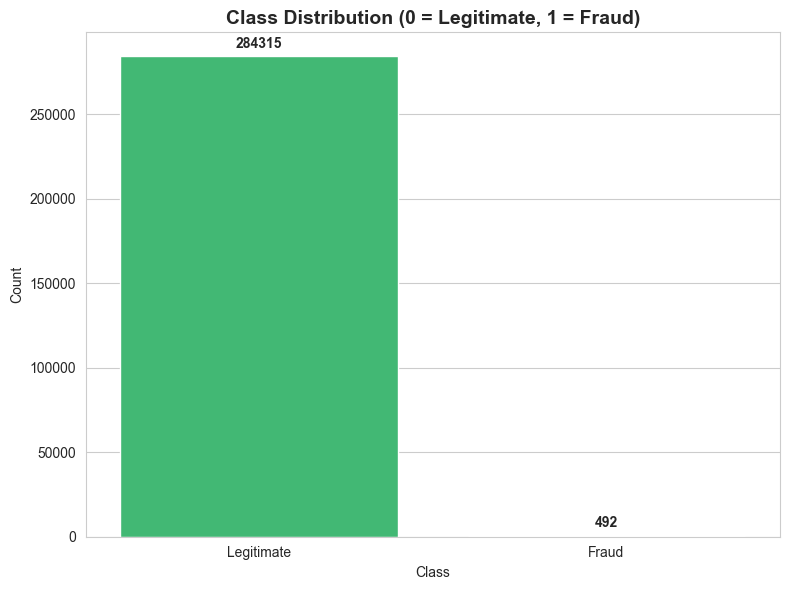


📊 Fraud cases: 0.1727% (492 out of 284807)
   Imbalance ratio: 1:578

Analyzing transaction amounts...


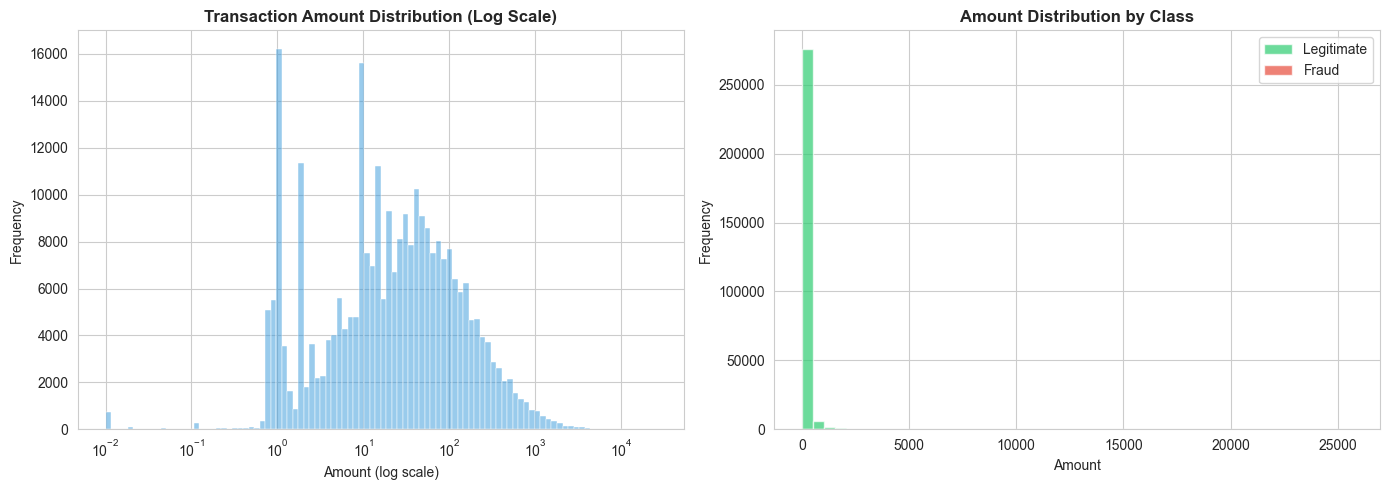

Amount statistics:
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87

Analyzing transaction times...


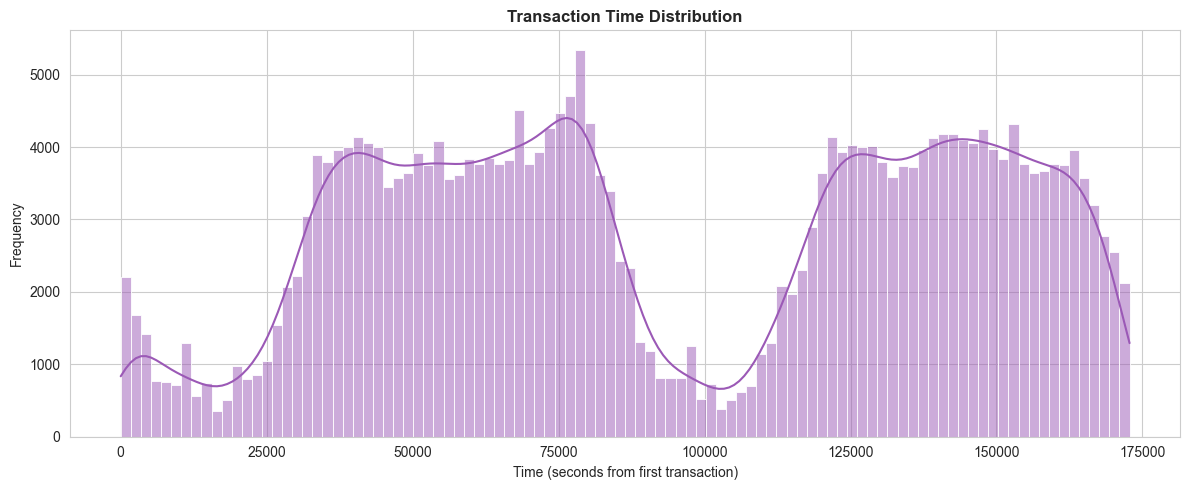

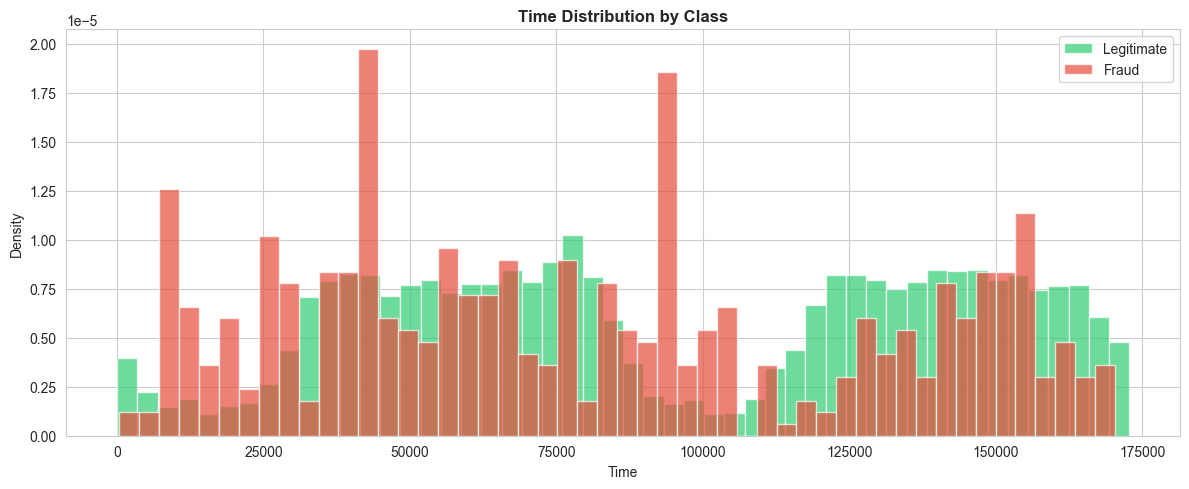


Generating correlation heatmap...


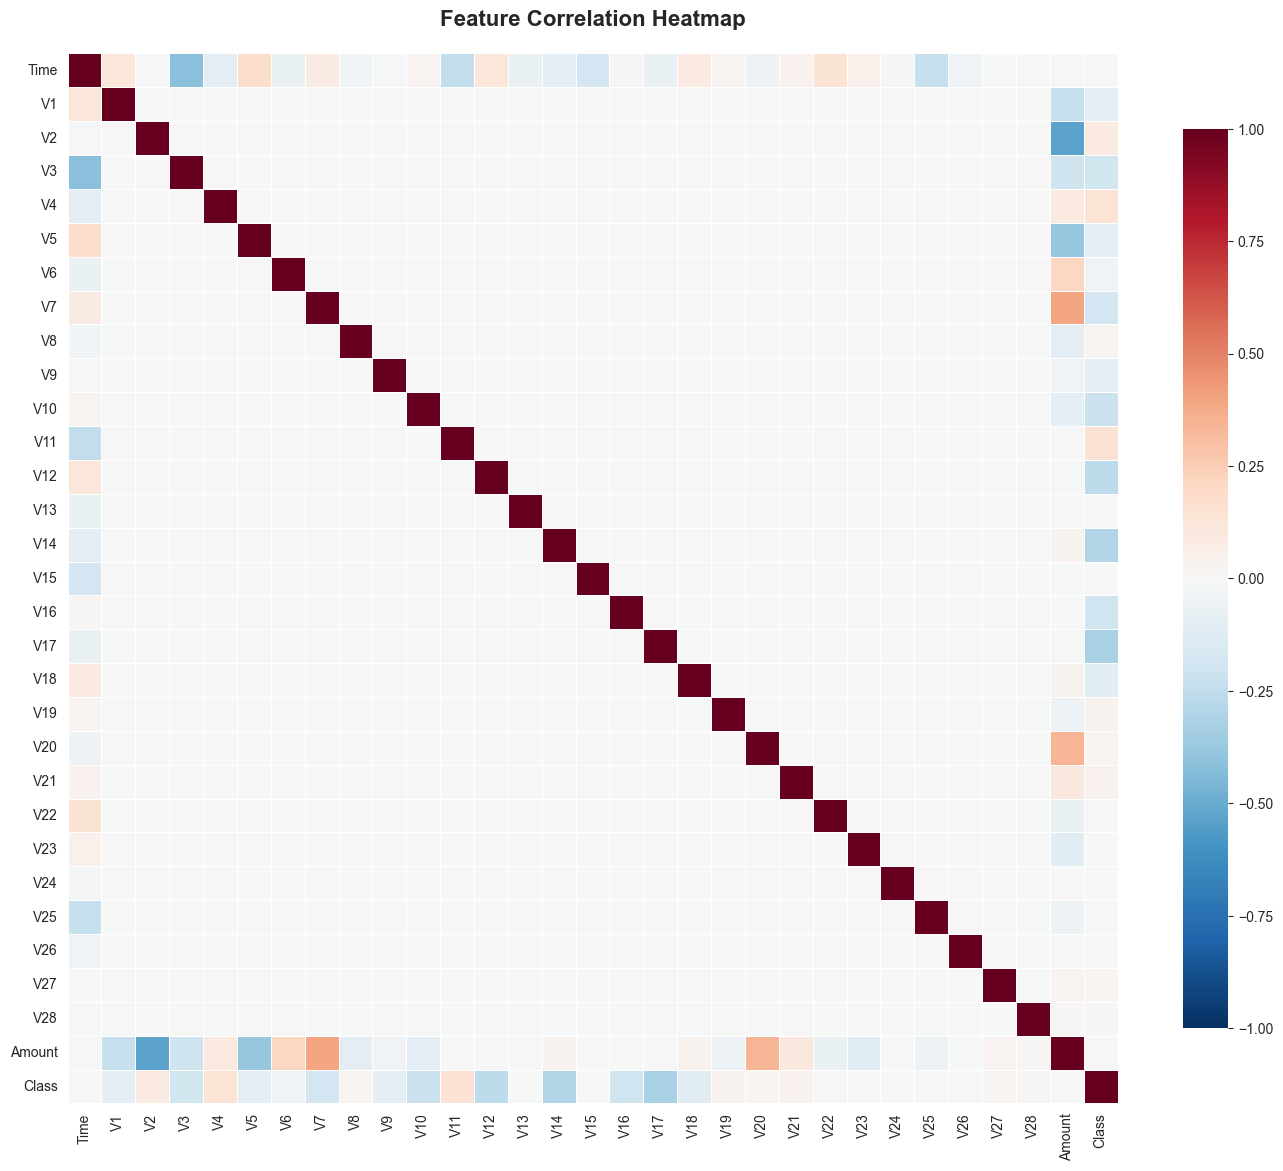


📈 Top 10 features correlated with fraud:
V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
V7     0.187257
V11    0.154876
V4     0.133447
V18    0.111485
Name: Class, dtype: float64

FEATURE STATISTICS
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5          

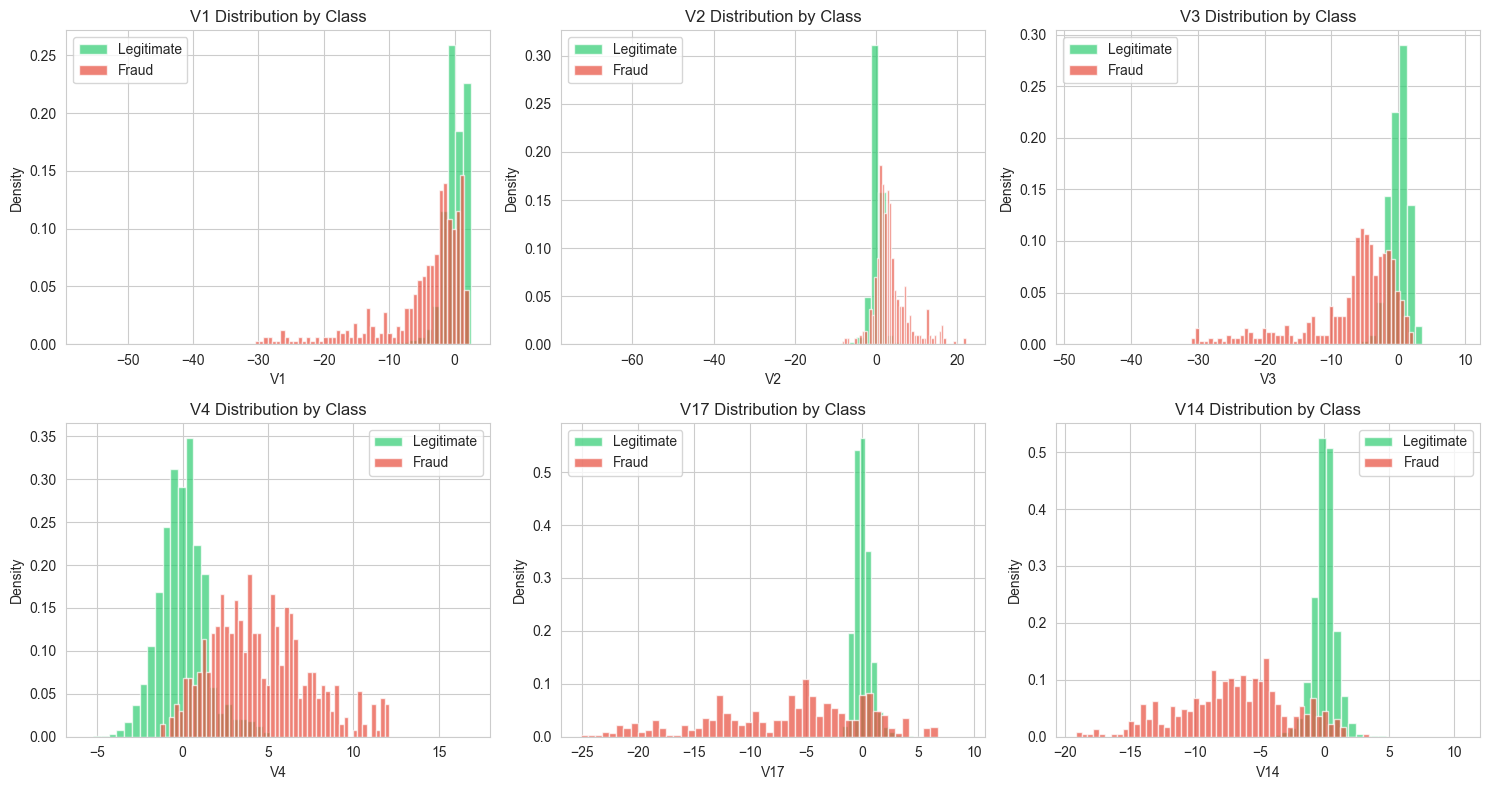


🔍 Detecting outliers in key features...


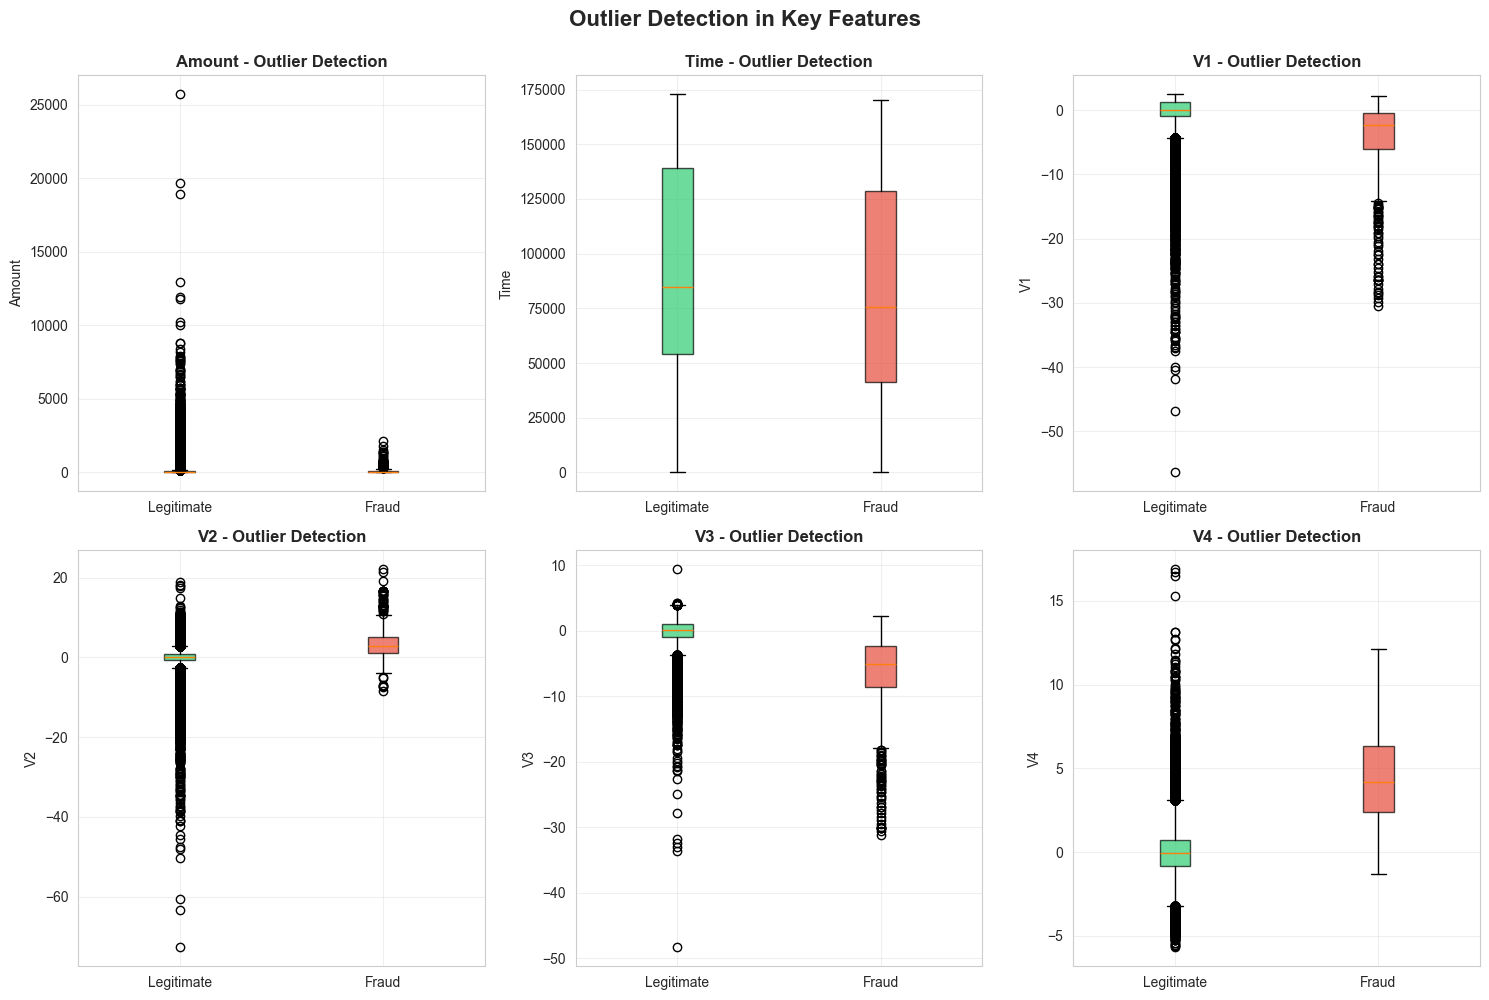


📊 Amount Outlier Statistics:
   Q1: 5.60, Q3: 77.16, IQR: 71.56
   Lower bound: -101.75, Upper bound: 184.51
   Outliers found: 31904 (11.20%)
   Outliers in fraud cases: 91

✅ EDA Complete! Visualizations saved to ../visualizations/eda/


In [1]:
# FraudDetectPro: Exploratory Data Analysis (EDA)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Create directory for saving plots
os.makedirs("../visualizations/eda", exist_ok=True)

# =====================
# 1. Load Data
# =====================
print("Loading data...")
df = pd.read_csv("../data/raw/creditcard.csv")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# =====================
# 2. Basic Info
# =====================
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
df.info()
print(f"\nMissing values: {df.isnull().sum().sum()}")
print(f"\nClass distribution:\n{df['Class'].value_counts()}")

# =====================
# 2.1 Missing Values Visualization
# =====================
print("\n📊 Checking for missing values...")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("   ✓ No missing values found!")
    # Create visualization showing no missing values
    plt.figure(figsize=(10, 6))
    missing_counts = missing_values[missing_values > 0] if missing_values.sum() > 0 else pd.Series([0])
    if len(missing_counts) == 0 or missing_counts.sum() == 0:
        # Show all columns with zero missing values
        plt.barh(range(len(df.columns)), [0]*len(df.columns), color='#2ecc71')
        plt.yticks(range(len(df.columns)), df.columns)
        plt.xlabel('Missing Values Count')
        plt.title('Missing Values Check - All Columns Complete', fontsize=14, fontweight='bold')
        plt.xlim(0, 1)
        for i, col in enumerate(df.columns):
            plt.text(0.1, i, f'{col}: 0', va='center', fontweight='bold', color='#27ae60')
    else:
        plt.barh(range(len(missing_counts)), missing_counts.values, color='#e74c3c')
        plt.yticks(range(len(missing_counts)), missing_counts.index)
        plt.xlabel('Missing Values Count')
        plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig("../visualizations/eda/missing_values.png", dpi=300, bbox_inches='tight')
    plt.show()
else:
    print(f"   ⚠️ Found {missing_values.sum()} missing values")
    plt.figure(figsize=(10, 6))
    missing_counts = missing_values[missing_values > 0]
    plt.barh(range(len(missing_counts)), missing_counts.values, color='#e74c3c')
    plt.yticks(range(len(missing_counts)), missing_counts.index)
    plt.xlabel('Missing Values Count')
    plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig("../visualizations/eda/missing_values.png", dpi=300, bbox_inches='tight')
    plt.show()

# =====================
# 3. Class Distribution
# =====================
print("\nGenerating class distribution plot...")
plt.figure(figsize=(8, 6))
sns.countplot(x="Class", data=df, palette=['#2ecc71', '#e74c3c'])
plt.title("Class Distribution (0 = Legitimate, 1 = Fraud)", fontsize=14, fontweight='bold')
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
for i, v in enumerate(df['Class'].value_counts().values):
    plt.text(i, v + 5000, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig("../visualizations/eda/class_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

fraud_ratio = df["Class"].mean() * 100
print(f"\n📊 Fraud cases: {fraud_ratio:.4f}% ({df['Class'].sum()} out of {len(df)})")
print(f"   Imbalance ratio: 1:{int(1/fraud_ratio*100)}")

# =====================
# 4. Amount Distribution
# =====================
print("\nAnalyzing transaction amounts...")
plt.figure(figsize=(14, 5))

# Log scale
plt.subplot(1, 2, 1)
sns.histplot(df["Amount"], bins=100, log_scale=True, kde=True, color='#3498db')
plt.title("Transaction Amount Distribution (Log Scale)", fontweight='bold')
plt.xlabel("Amount (log scale)")
plt.ylabel("Frequency")

# By class
plt.subplot(1, 2, 2)
df[df['Class'] == 0]['Amount'].hist(bins=50, alpha=0.7, label='Legitimate', color='#2ecc71')
df[df['Class'] == 1]['Amount'].hist(bins=50, alpha=0.7, label='Fraud', color='#e74c3c')
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.title("Amount Distribution by Class", fontweight='bold')
plt.legend()

plt.tight_layout()
plt.savefig("../visualizations/eda/amount_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

print(f"Amount statistics:")
print(df.groupby('Class')['Amount'].describe())

# =====================
# 5. Time Distribution
# =====================
print("\nAnalyzing transaction times...")
plt.figure(figsize=(12, 5))
sns.histplot(df["Time"], bins=100, kde=True, color='#9b59b6')
plt.title("Transaction Time Distribution", fontweight='bold')
plt.xlabel("Time (seconds from first transaction)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("../visualizations/eda/time_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

# Time by class
plt.figure(figsize=(12, 5))
df[df['Class'] == 0]['Time'].hist(bins=50, alpha=0.7, label='Legitimate', color='#2ecc71', density=True)
df[df['Class'] == 1]['Time'].hist(bins=50, alpha=0.7, label='Fraud', color='#e74c3c', density=True)
plt.xlabel("Time")
plt.ylabel("Density")
plt.title("Time Distribution by Class", fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig("../visualizations/eda/time_by_class.png", dpi=300, bbox_inches='tight')
plt.show()

# =====================
# 6. Correlation Heatmap
# =====================
print("\nGenerating correlation heatmap...")
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr()
sns.heatmap(
    correlation_matrix, 
    cmap="RdBu_r",  # Red-Blue reversed for better visualization
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    vmin=-1, vmax=1
)
plt.title("Feature Correlation Heatmap", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig("../visualizations/eda/correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

# Top correlations with Class
print("\n📈 Top 10 features correlated with fraud:")
class_corr = correlation_matrix['Class'].abs().sort_values(ascending=False)[1:11]
print(class_corr)

# =====================
# 7. Feature Statistics
# =====================
print("\n" + "="*50)
print("FEATURE STATISTICS")
print("="*50)
print(df.describe())

# =====================
# 8. PCA Features Analysis
# =====================
print("\nAnalyzing PCA features...")
v_features = [col for col in df.columns if col.startswith('V')]

# Sample some PCA features
sample_features = ['V1', 'V2', 'V3', 'V4', 'V17', 'V14']
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, feature in enumerate(sample_features):
    df[df['Class'] == 0][feature].hist(bins=50, alpha=0.7, ax=axes[idx], 
                                        label='Legitimate', color='#2ecc71', density=True)
    df[df['Class'] == 1][feature].hist(bins=50, alpha=0.7, ax=axes[idx], 
                                        label='Fraud', color='#e74c3c', density=True)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Density')
    axes[idx].legend()
    axes[idx].set_title(f'{feature} Distribution by Class')

plt.tight_layout()
plt.savefig("../visualizations/eda/pca_features_sample.png", dpi=300, bbox_inches='tight')
plt.show()

# =====================
# 9. Outlier Detection (Box Plots)
# =====================
print("\n🔍 Detecting outliers in key features...")
# Select key features for outlier analysis
outlier_features = ['Amount', 'Time', 'V1', 'V2', 'V3', 'V4']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(outlier_features):
    data_to_plot = [df[df['Class'] == 0][feature].values, 
                    df[df['Class'] == 1][feature].values]
    bp = axes[idx].boxplot(data_to_plot, labels=['Legitimate', 'Fraud'], 
                           patch_artist=True, showfliers=True)
    
    # Color the boxes
    colors = ['#2ecc71', '#e74c3c']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[idx].set_ylabel(feature)
    axes[idx].set_title(f'{feature} - Outlier Detection', fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Outlier Detection in Key Features', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig("../visualizations/eda/outlier_detection.png", dpi=300, bbox_inches='tight')
plt.show()

# Calculate IQR for Amount (most important feature)
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print(f"\n📊 Amount Outlier Statistics:")
print(f"   Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"   Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
print(f"   Outliers found: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
print(f"   Outliers in fraud cases: {outliers[outliers['Class']==1].shape[0]}")

print("\n✅ EDA Complete! Visualizations saved to ../visualizations/eda/")